# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Adrianna Webb

[Git Repo](https://github.com/AdriannaWebb/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [4]:
import requests
import pickle

# URL 
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Make a request 
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    
    with open('article.pkl', 'wb') as f:
        pickle.dump(html_content, f)
    
    print("HTML content successfully saved to article.pkl")
    print(f"Content length: {len(html_content)} characters")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

HTML content successfully saved to article.pkl
Content length: 335691 characters


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [5]:
import pickle
from bs4 import BeautifulSoup

# Read the HTML content from the pickle file
with open('article.pkl', 'rb') as f:
    html_content = pickle.load(f)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Extract and print the text content
article_text = soup.get_text()

print("Article text extracted successfully!")
print(f"Text length: {len(article_text)} characters")


Article text extracted successfully!
Text length: 65607 characters


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
import spacy
from collections import Counter

# Load the spaCy pipeline 
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Extract tokens, convert to lowercase and filter out unwanted items
tokens = []
for token in doc:
    # Skip punctuation
    if not token.is_punct and not token.is_stop and not token.is_space and token.text.strip():
        tokens.append(token.text.lower())

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

print("5 Most Frequent Tokens:")
print("-" * 30)
for i, (token, freq) in enumerate(most_common_tokens, 1):
    print(f"{i}. '{token}' - appears {freq} times")

print(f"\nTotal unique tokens analyzed: {len(token_freq)}")
print(f"Total tokens processed: {len(tokens)}")

5 Most Frequent Tokens:
------------------------------
1. 'comment' - appears 136 times
2. 'march' - appears 133 times
3. '2021' - appears 133 times
4. 'says' - appears 132 times
5. 'report' - appears 130 times

Total unique tokens analyzed: 2276
Total tokens processed: 5888


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [8]:
# Extract lemmas, convert to lowercase, filter out unwanted items
lemmas = []
for token in doc:
    # Skip punctuation, stopwords, and whitespace
    if not token.is_punct and not token.is_stop and not token.is_space and token.text.strip():
        lemmas.append(token.lemma_.lower())

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

print("5 Most Frequent Lemmas:")
print("-" * 30)
for i, (lemma, freq) in enumerate(most_common_lemmas, 1):
    print(f"{i}. '{lemma}' - appears {freq} times")

print(f"\nTotal unique lemmas analyzed: {len(lemma_freq)}")
print(f"Total lemmas processed: {len(lemmas)}")

5 Most Frequent Lemmas:
------------------------------
1. 'comment' - appears 157 times
2. 'say' - appears 134 times
3. 'march' - appears 133 times
4. '2021' - appears 133 times
5. 'report' - appears 130 times

Total unique lemmas analyzed: 2008
Total lemmas processed: 5888


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [11]:
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the score of a sentence based on interesting tokens.
    Score = (number of interesting tokens in sentence) / (total words in sentence)
    """

    doc_sent = nlp(sentence)
    
    # Get all tokens 
    sentence_tokens = []
    for token in doc_sent:
        if not token.is_punct and not token.is_stop and not token.is_space and token.text.strip():
            sentence_tokens.append(token.text.lower())
    
    if len(sentence_tokens) == 0:
        return 0.0
    
    # Count how many iteresting tokens appear in the sentence
    interesting_count = sum(1 for token in sentence_tokens if token in interesting_tokens)
    
    return interesting_count / len(sentence_tokens)


def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the score of a sentence based on interesting lemmas.
    Score = (number of interesting lemmas in sentence) / (total words in sentence)
    """
    # Process the sentence with spaCy
    doc_sent = nlp(sentence)
    
    # Get all lemmas (excluding punctuation, stopwords, whitespace)
    sentence_lemmas = []
    for token in doc_sent:
        if not token.is_punct and not token.is_stop and not token.is_space and token.text.strip():
            sentence_lemmas.append(token.lemma_.lower())
    
    if len(sentence_lemmas) == 0:
        return 0.0
    
    # Count how many interesting lemmas appear in the sentence
    interesting_count = sum(1 for lemma in sentence_lemmas if lemma in interesting_lemmas)
    
    return interesting_count / len(sentence_lemmas)


# Get better sentences by filtering out very short or weird ones
sentences = []
for sent in doc.sents:
    clean_sent = sent.text.strip()
    # Filter out sentences that are too short or contain mostly non-alphabetic characters
    if len(clean_sent) > 20 and len([c for c in clean_sent if c.isalpha()]) > len(clean_sent) * 0.5:
        sentences.append(clean_sent)

# Find a good first sentence (skip navigation/header content)
first_sentence = None
for sent in sentences:
    if len(sent.split()) > 5:  # At least 5 words
        first_sentence = sent
        break

if first_sentence is None:
    first_sentence = sentences[0] if sentences else "No suitable sentence found"

# Get the top 5 tokens and lemmas as lists
top_tokens = [token for token, freq in most_common_tokens]
top_lemmas = [lemma for lemma, freq in most_common_lemmas]

print("First meaningful sentence:")
print(f"'{first_sentence}'")
print()

# Test both scoring functions
token_score = score_sentence_by_token(first_sentence, top_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, top_lemmas)

print("Scoring Results:")
print("-" * 20)
print(f"Score using tokens: {token_score:.4f}")
print(f"Score using lemmas: {lemma_score:.4f}")
print()
print(f"Top 5 tokens used: {top_tokens}")
print(f"Top 5 lemmas used: {top_lemmas}")


First meaningful sentence:
'How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.'

Scoring Results:
--------------------
Score using tokens: 0.1500
Score using lemmas: 0.2000

Top 5 tokens used: ['comment', 'march', '2021', 'says', 'report']
Top 5 lemmas used: ['comment', 'say', 'march', '2021', 'report']


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

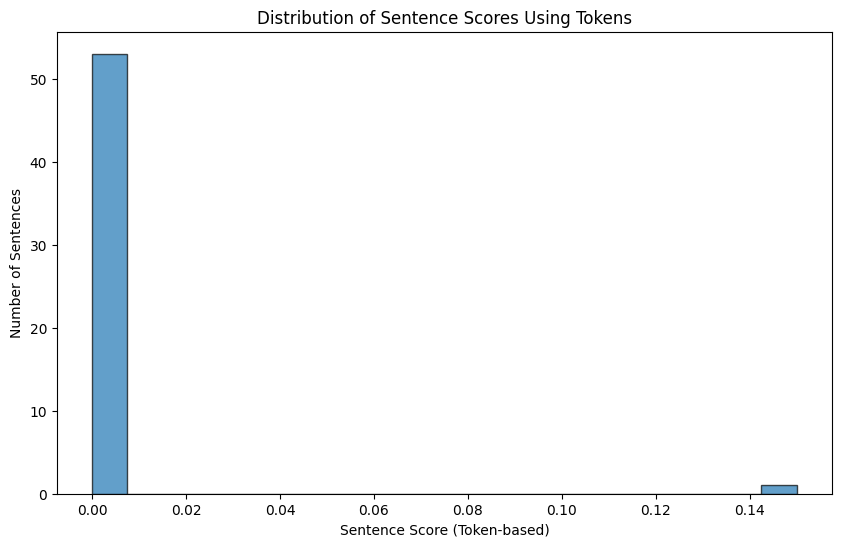

Total sentences analyzed: 54


In [ ]:
import matplotlib.pyplot as plt

# Calculate scores for all sentences using tokens
sentence_scores_tokens = []
for sentence in sentences:
    if len(sentence.strip()) > 5:  # Only score meaningful sentences
        score = score_sentence_by_token(sentence, top_tokens)
        sentence_scores_tokens.append(score)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_tokens, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentence Scores Using Tokens')
plt.xlabel('Sentence Score (Token-based)')
plt.ylabel('Number of Sentences')
plt.show()

print(f"Total sentences analyzed: {len(sentence_scores_tokens)}")

# From the histogram, the most common range of scores appears to be 0.0-0.1, meaning that most sentences contain few or none of the most frequent tokens.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

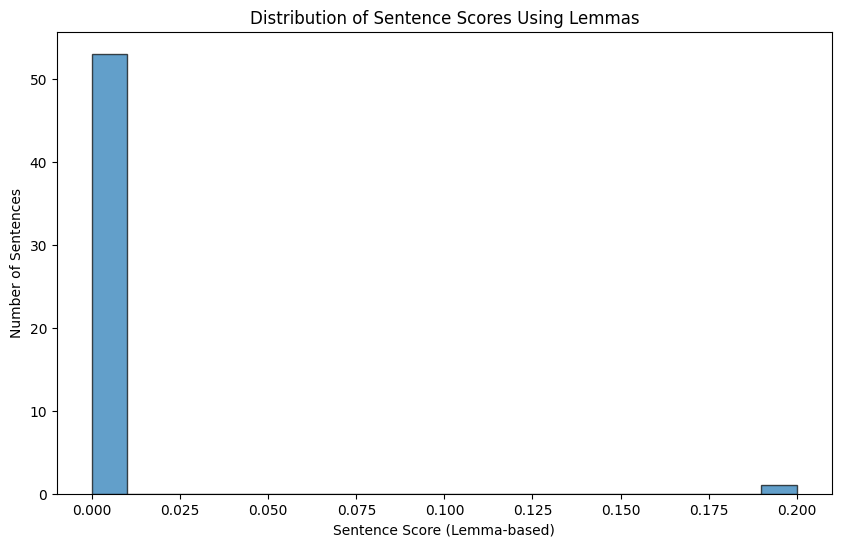

Total sentences analyzed: 54


In [14]:
# Calculate scores for all sentences using lemmas
sentence_scores_lemmas = []
for sentence in sentences:
    if len(sentence.strip()) > 5:  # Only score meaningful sentences
        score = score_sentence_by_lemma(sentence, top_lemmas)
        sentence_scores_lemmas.append(score)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentence Scores Using Lemmas')
plt.xlabel('Sentence Score (Lemma-based)')
plt.ylabel('Number of Sentences')
plt.show()

print(f"Total sentences analyzed: {len(sentence_scores_lemmas)}")

# From the histogram, the most common range of scores appears to be 0.000-0.025

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

We could want to omit 'says' and '2021' from both tokens and lexems. To do that we could use spaCy's `.pos_` attribute. 